In [121]:
import pandas as pd
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

#nltk.download('cmudict')
arpabet = nltk.corpus.cmudict.dict()

In [76]:
def get_slang_dict_dirty():
    slang = {
        "prob'ly":['P R AA1', 'B L IY0'],
          "practic'ly": ['P R AE1 K','T AH0 K','L IY0'],
          "acquiescent":  ["AE2","K W IY0","EH1","S AH0 N T"],
          "mediocrities": ["M IY2","D IY0","AA1","K R AH0","T IY0 Z"],
          "casse": ["K AH0 S"],
          "bonsoir": ["B AA0 N","S W AA1"],
          "m'appelle": ["M AH0","P EH1 L"],
          "toi": ["T W AA1"],
          "brrrah": ["B R AA1"],
          "brraaah": ["B R AA1"],
          "drano": ['D R EY1','N OW0'],
          "am":["AE1 M"],
          "diametric'ly": ["D AY2","AH0","M EH1","T R IH0 K","L IY0"],
          "hypertone": ["HH AY1","P ER0","T OW2 N"],
          "unawareness": ["AH2 N","AH0","W EH1 R","N AH0 S"],
          "assassinator": ["AH0","S AE1","S AH0","N EY2 T","AO0 R"],
          "fiending": ["F IY1 N","D IH0 NG"],
          "dj": ["D IY1","JH EY0"],
          "ev'ry": ['EH1', 'V R IY0'],
          "famished": ['F AE M', 'IH SH T'],
          "blamin'": ["B L EY1", "M IH0 N"],
          "corsets": ["K AO1 R","S AH0 T S"],
          "shittin'": ["SH IH1", "T IH0 NG"],
          "hist'ry": ["HH IH1","T R IY0"],
          "onarchy": ["AA1","N AA0 R","K IY0"],
          "knuckleheads": ["N AH1", "K AH0 L", "HH EH2 D Z"],
          "parentis": ["P AH0","R EH1 N","T AH0 S"],
          "cuz": ["K AH1 Z"],
          "manumission": ["M AE1","N Y UW0","M IH2","SH AH0 N"],
          "hungriest": ["HH AH1 NG", "G R IY0","AH0 S T"],
          "unimpeachable": ["AH2 N","IH0 M","P IY1","CH AH0","B OW0 L"],
          "impoverished": ["IH0 M","P AA1","V ER0","IH0 SH T"],
          "i'mma": ["AY1","M AH0"],
          "rakim": ["R AH0","K IY1 M"],
          "microphonist": ["M AY1","K R AH0","F OW2","N AH0 S T"],
          "dissed": ["D IH1 S T"],
          "7": ["S EH1","V AH0 N"],
          "21": ["T W EH1 N","T IY0","W AH1 N"],
          "fessing": ["F EH1","S IH0 NG"],
          "dissing": ["D IH1","S IH0 NG"],
          "marl": ["M AA1 R L"],
          "blaow": ["B L AW1"],
          "illest": ["IH1 L", "AH0 S T"],
          "realest": ["R IY1 L", "AH0 S T"],
          "50": ["F IH1 F", "T IY0"],
          "underoo": ["AH1 N","D ER0","UW2 S"],
          "'what's": ["W AH0 T S"],
          "hoodie": ["HH UH1","D IY0"],
          "atch": ["AE1 CH"],
          "niggas'll": ["N IH1","G AH0 Z","UH0 L"],
          "nigga": ["N IH1","G AH0"],
          "niggaz": ["N IH1","G AH0 Z"],
          "dunny": ["D AH1","N IY0"],
          "fucker": ["F AH1", "K ER0"],
          "fistfight": ["F IH1 S T","F AY2 T"],
          "motherfucking": ["M AH2","DH ER0","F AH1","K IH0 NG"],
          "motherfucker": ["M AH2","DH ER0","F AH1","K EH0"],
          "wonka": ["W AE1 N", "K AH0"],
          "us": ["AH1 S"],
          "thirstay": ["TH ER1","S T EY0"],
          "las": ["L AA1 S"],
          "ovaltine": ["OW1","V AH0 L","T IY2 N"],
          "'cedes": ["S EY1","D IY0 Z"],
          "papi": ["P AA1","P IY0"],
          "mobb": ["M AA1 B"],
          "guccis": ["G UW1","CH IY0 Z"],
          "poom": ["P UW1 M"],
          "pooms": ["P UW1 M Z"],
          "boones": ["B UW1 N Z"],
          "hoochies": ["HH UW1","CH IY0"],
          "coochies": ["K UW1","CH IY0"],
          "fugees": ["F UW1","ZH IY0 Z"],
          "sess": ["S EH1 S"],
          "goretex": ["G AO1 R","T EH0 K S"],
          "'n'": ["EH0 N"],
          "gon'": ["G AA1 N"],
          "perfected": ["P ER0","F EH1 K","T IH0 D"],
          "def": ["D EH1 F"],
          "hero": ["H IY1","R OW0"],
          "mo'": ["M OW1"],
          "nas": ["N AA1 S"],
          "bama": ["B AE1","M AH0"],
          "audemars": ["AO1","D EH0","M AA0 R S"],
          "rollies": ["R OW1","L IY0 Z"],
          "illuminati": ["IH0","L UW1","M IH0","N AA0","T IY0"],
          "kanye": ["K AA1 N","Y EY0"],
          "cadien": ["K EY1","D IY0","AH0 N"],
          "rhyme": ["R AY1 M"],
          "rhymers": ["R AY1 M","ER0 Z"],
          "flossing": ["F L AO1 S","IH0 NG"],
          "tulip": ["T UW1","L IH0 P"],
          "illing": ["IH1 L","IH0 NG"],
          "'88": ["EY1","T IY0","EY2 T"],
          "demeanour": ["D IH0","M IY1","N ER0"],
          "jigga": ["JH IH1","G AH0"],
          "hova": ["HH OW1","V AH0"],
          "hov": ["HH OW1 V"],
          "masqueradin": ["M AE2 S","K ER0","EY1","D IH0 N"],
          "atomically": ["AH0","T AA1","M AH0 K","L IY0"],
          "mockerie": ["M AA1","K ER0","IY0"],
          "killa": ["K IH1","L AH1"],
          "beez": ["B IY1 Z"],
          "shackling": ["SH AE1","K AH0", "L IH0 NG"],
          "shinobi": ["SH IH0","N OW1", "B IY0"],
          "y'all'll": ["Y AO2 L","UH0 L"],
          "baddest": ["B AE1","D EH0 S T"],
          "effervescence": ["EH2","F ER0","V EH1","S EH0 N S"],
          "16": ["S IH0 K S","T IY1 N"],
          "steelo": ["S T IY1", "L OW0"],
          "ceelo": ["S IY1", "L OW0"],
          "airplay": ["EH1 R","P L EY0 N"],
          "baseheads": ["B EY1 S","HH EH2 D Z"],
          "amps": ["AE1 M P S"],
          "yellowback": ["Y EH1","L OW0","B AE2 K S"],
          "realness": ["R IY1 L","N AH0 S"],
          "queensbridge": ["K W IY1 N Z","B R IH2 JH"],
          "nuff": ["N AH1 F"],
          "squadron'll": ["S K W AA1","D R AH0 N","UH0 L"],
          "bp": ["B IY1","P IY2"],
          "mañana": ["M AH0 N","Y AA1","N AA0"],
          "manzana": ["M AH0 N","Z AA1","N AA0"],
          "pana": ["P AA1","N AA0"],
          "slurping": ["S L ER1","P IH0 NG"],
          "diddly": ["D IH1 D","L IY0"],
          "loca": ["L OW1","K AH0"],
          "tocha": ["T OW1","CH AH0"],
          "pinga": ["P IH1 NG", "G AH0"],
          "bolla": ["B OW1","L AH0"],
          "boriqua": ["B AO0 R","IY1","K W AH0"],
          "'scuse": ["S K Y UW1 S"],
          "cunt": ["K AH1 N T"],
          "menage": ["M AY1","N AA2 JH"],
          "percenter": ["P ER0","S EH1 N","T ER0"],
          "capers'll": ["K EY1","P ER0 Z","UH0 L"],
          "bullethole": ["B UH1","L AH0 T","HH OW2 L"],
          "peephole": ["P IY1 P","HH OW2 L"],
          "boardhead": ["B AO1 R D","HH EH2 D"],
          "1000": ["W AH1 N","TH AW2","Z AH0 N D"],
          "lb": ["EH1 L","B IY2"],
          "punisher": ["P AH1","N IH0","SH ER0"],
          "slaver": ["S L EY1","V ER0"],
          "ev'ryone": ["EH1","V R IY0","W AH2 N"],
          "rochambeau": ["R OW1","SH AE0 M","B OW2"],
          "ingenuitive": ["IH0 N","JH AH0","N UW1","AH0","T IH0 V"],
          "outplanned": ["AW0 T","P L AE1 N D"],
          "giddyup": ["G IH1","D IY0","AH2 P"]
         }
    return slang

In [95]:
def clean_slang_dict(slang_dict):
    
    for key, value in slang_dict.items():
        
        phoneme_list = value
        # Join all of the phonemes (previously seperated by commas into sylables) into one list
        phoneme_list = ' '.join(phoneme_list)
        
        phoneme = phoneme_list.split()
        slang_dict[key] = phoneme
    
    return slang_dict

In [ ]:
slang_dict = clean_slang_dict(get_slang_dict_dirty())

In [124]:
def txt_to_phoneme_types(file):
    sounds = []
    error = 0
    
    with open(file, 'r') as f:
        for line in f:

            # Remove punctuation and tokenize
            tokenizer = RegexpTokenizer(r'\w+')
            tokens = tokenizer.tokenize(line)
            
            # For every word, split it into phonemes 
            # Then, find out what type of sound that phoneme is and add it to an array
            for word in tokens:
                word = word.lower()

                try:
                    phonemes = arpabet[word][0]
                    
                    for p in phonemes:
                        sound = phoneme_sound_dict(p)
                        sounds.append(sound)

                except Exception as e:
                    try:
                        phonemes = get_slang_phonemes(word)
                        print('Used the slang dict on ' + word)
                        for p in phonemes:
                            sound = phoneme_sound_dict(p)
                            sounds.append(sound)

                    except Exception as e:
                        print("Error " + str(e))
                        error += 1
                        sounds.append('error')

                sounds.append('space')
                
            sounds.append('new line')

        print('Error is ' + str(error))
        return sounds
       
sounds = txt_to_phoneme_types('Radioactive-Introduction_Yelawolf.txt')

#txt_to_phoneme_types('Radioactive-Introduction_Yelawolf.txt')

Error '5'
Error '5'
Error 'yelawolf'
Error 'drinkin'
Error 'brauds'
Error 'whistlin'
Error 'slumerican'
Error 'dopeman'
Error 'choppin'
Error 'bringin'
Error 'hookless'
Error 'didn'
Error 'runnin'
Used the slang dict on 16
Error 'S IH0 K S'
Used the slang dict on 7
Error 'S EH1'
Error '2'
Error '87'
Error is 17


In [8]:
# This makes a similarity matrix for +/- 3 sounds before and after a sounds
def make_sim_matrix(phonemes_list):
    
    sim_matrix = [[]]
    
    for p in phonemes_list:
        index = phonemes_list.get_loc[p]
        if (index > 3) and (index < (len(phonemes) - 3)):
            sim_matrix[index, index - 3] = phoneme_similarity(phonemes[index], phonemes[index - 3])
            sim_matrix[index, index - 2] = phoneme_similarity(phonemes[index], phonemes[index - 2])
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
            sim_matrix[index, index + 2] = phoneme_similarity(phonemes[index], phonemes[index + 2])
            sim_matrix[index, index + 3] = phoneme_similarity(phonemes[index], phonemes[index + 3])

        elif (index == 1):
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
            sim_matrix[index, index + 2] = phoneme_similarity(phonemes[index], phonemes[index + 2])
            sim_matrix[index, index + 3] = phoneme_similarity(phonemes[index], phonemes[index + 3])
        
        elif (index == 2):
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
            sim_matrix[index, index + 2] = phoneme_similarity(phonemes[index], phonemes[index + 2])
            sim_matrix[index, index + 3] = phoneme_similarity(phonemes[index], phonemes[index + 3])
        
        elif (index == 3):
            sim_matrix[index, index - 2] = phoneme_similarity(phonemes[index], phonemes[index - 2])
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
            sim_matrix[index, index + 2] = phoneme_similarity(phonemes[index], phonemes[index + 2])
            sim_matrix[index, index + 3] = phoneme_similarity(phonemes[index], phonemes[index + 3])

        elif (index == len(phonmes) - 3):
            sim_matrix[index, index - 3] = phoneme_similarity(phonemes[index], phonemes[index - 3])
            sim_matrix[index, index - 2] = phoneme_similarity(phonemes[index], phonemes[index - 2])
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
            sim_matrix[index, index + 2] = phoneme_similarity(phonemes[index], phonemes[index + 2])
    

        elif (index == len(phonmes) - 2):
            sim_matrix[index, index - 3] = phoneme_similarity(phonemes[index], phonemes[index - 3])
            sim_matrix[index, index - 2] = phoneme_similarity(phonemes[index], phonemes[index - 2])
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
            sim_matrix[index, index + 1] = phoneme_similarity(phonemes[index], phonemes[index + 1])
        

        elif (index == len(phonmes) - 1):
            sim_matrix[index, index - 3] = phoneme_similarity(phonemes[index], phonemes[index - 3])
            sim_matrix[index, index - 2] = phoneme_similarity(phonemes[index], phonemes[index - 2])
            sim_matrix[index, index - 1] = phoneme_similarity(phonemes[index], phonemes[index - 1])
            sim_matrix[index, index] = phoneme_similarity(phonemes[index], phonemes[index])
    
            
        return sim_matrix

In [119]:
def phoneme_similarity(p, p1):
    
    # What type of sounds is the phononeme
    p = nltk.sound_type(p)
    p1 = nltk.sound_type(p)
    
    # Note that phoneme_similarity(p, p1) == phoneme_similarity(p1, p)
    # That is phoneme_similarity is symmetric
    pass
'''
    if p == p1:
        sim = 1
        
    elif p == 'fricative':
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'affricate':
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 

            
    elif p == 'vowel':
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'semivowel':
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'nasal':
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'liquid':
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'aspirate':
        if p1 == 'stop':
            sim = 
    
        
        
    return sim
'''

IndentationError: unexpected indent (<ipython-input-119-fa10e3e169d0>, line 4)

(15, 154)
[[ 0.4   0.99  0.   ...,  0.    0.    0.2 ]
 [ 0.99  0.    0.99 ...,  0.    0.99  0.6 ]
 [ 0.6   0.4   0.99 ...,  0.6   0.6   0.6 ]
 ..., 
 [ 0.99  0.4   0.4  ...,  0.2   0.2   0.  ]
 [ 0.99  0.    0.99 ...,  0.99  0.6   0.99]
 [ 0.6   0.6   0.99 ...,  0.2   0.2   0.2 ]]


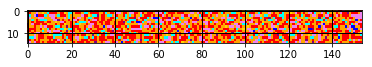

In [259]:
def visualize(sounds):
    m = np.matrix([1]*len(sounds), dtype=float).T
    count = 0
    
    for sound in sounds:
        #print(sound)
        
        if sound is 'fricative':
            val = .2
        elif sound is 'affricate':
            val = .3 
        elif sound is 'vowel':
            val = .99
        elif sound is 'semivowel':
            val = .8
        elif sound is 'nasal':
            val = .6
        elif sound is 'liquid':
            val = .4
        elif sound is 'aspirate':
            val = .7
        elif sound is 'stop':
            val = 0
            
        #print(val)
        
        #print('The count and val are {} and {}'.format(count, val))
        m.put(count, val)
        #m.put(.9, 12)
        count +=  1
    
    m = np.reshape(m, (15,154))
    print(m.shape)
    print(m)

    data = np.random.rand(10, 10)
    #x = np.linspace(0, 3 * np.pi, 500)
    #y = np.sin(x)

    # create discrete colormap
    cmap = colors.ListedColormap(['red', 'blue', 'cyan', 'green', 'violet', 'purple', 'gold', 'orange'])
    bounds = [0, .21, .31, .41, .51, .61, .71, .81, 1]
    #bounds = ['fricative', 'stop', 'affricative']
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(m, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=1)
    #ax.set_xticks(np.arange(-.5, 10, 1));
    #ax.set_yticks(np.arange(-.5, 10, 1));

    plt.show()
    
visualize(sounds)


In [ ]:
def main():
    sounds = txt_to_phoneme_types('Radioactive-Introduction_Yelawolf.txt')
    #sim_matrix = make_sim_matrix(sounds)
    vizualize(sounds)
    

In [104]:
def phoneme_sound_dict(key):
    phon_dict = {
    'AA':'vowel',
    'AA0':'vowel',
    'AA1':'vowel',
    'AA2':'vowel',
    'AE':'vowel',
    'AE0':'vowel',
    'AE1':'vowel',
    'AE2':'vowel',
    'AH':'vowel',
    'AH0':'vowel',
    'AH1':'vowel',
    'AH2':'vowel',
    'AO':'vowel',
    'AO0':'vowel',
    'AO1':'vowel',
    'AO2':'vowel',
    'AW':'vowel',
    'AW0':'vowel',
    'AW1':'vowel',
    'AW2':'vowel',
    'AY':'vowel',
    'AY0':'vowel',
    'AY1':'vowel',
    'AY2':'vowel',
    'B':'stop',
    'CH':'affricate',
    'D':'stop',
    'DH':'fricative',
    'EH':'vowel',
    'EH0':'vowel',
    'EH1':'vowel',
    'EH2':'vowel',
    'ER':'vowel',
    'ER0':'vowel',
    'ER1':'vowel',
    'ER2':'vowel',
    'EY':'vowel',
    'EY0':'vowel',
    'EY1':'vowel',
    'EY2':'vowel',
    'F':'fricative',
    'G':'stop',
    'HH':'aspirate',
    'IH':'vowel',
    'IH0':'vowel',
    'IH1':'vowel',
    'IH2':'vowel',
    'IY':'vowel',
    'IY0':'vowel',
    'IY1':'vowel',
    'IY2':'vowel',
    'JH':'affricate',
    'K':'stop',
    'L':'liquid',
    'M':'nasal',
    'N':'nasal',
    'NG':'nasal',
    'OW':'vowel',
    'OW0':'vowel',
    'OW1':'vowel',
    'OW2':'vowel',
    'OY':'vowel',
    'OY0':'vowel',
    'OY1':'vowel',
    'OY2':'vowel',
    'P':'stop',
    'R':'liquid',
    'S':'fricative',
    'SH':'fricative',
    'T': 'stop',
    'TH':'fricative',
    'UH':'vowel',
    'UH0':'vowel',
    'UH1':'vowel',
    'UH2':'vowel',
    'UW':'vowel',
    'UW0':'vowel',
    'UW1':'vowel',
    'UW2':'vowel',
    'V':'fricative',
    'W' : 'semivowel',
    'Y':'semivowel',
    'Z':'fricative',
    'ZH':'fricative',
    }
    
    return phon_dict[key]

#phoneme_sound_dict('Y')

'semivowel'

OLD CODE

In [10]:
#def phoneme_similarity_old(p, p1):
    
    # What type of sounds is the phononeme
    p = nltk.sound_type(p)
    p1 = nltk.sound_type(p)
    
    if p == p1:
        sim = 1
        
    elif p == 'fricative':
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'affricate':
        if p1 == 'fricative':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 

            
    elif p == 'vowel':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'semivowel':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'nasal':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'liquid':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'aspirate':
            sim
        if p1 == 'stop':
            sim = 
            
    elif p == 'aspirate':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'stop':
            sim = 
            
    elif p == 'stop':
        if p1 == 'fricative':
            sim = 
        if p1 == 'affricate':
            sim = 
        if p1 == 'vowel':
            sim = 
        if p1 == 'semivowel':
            sim = 
        if p1 == 'nasal':
            sim = 
        if p1 == 'liquid':
            sim = 
        if p1 == 'aspirate':
            sim
    
        
        
    return sim

IndentationError: unexpected indent (<ipython-input-10-5501ab68f4f2>, line 4)

In [103]:
def get_dirty_slang_phonemes(key):
    slang = {
        "prob'ly":['P R AA1', 'B L IY0'],
          "practic'ly": ['P R AE1 K','T AH0 K','L IY0'],
          "acquiescent":  ["AE2","K W IY0","EH1","S AH0 N T"],
          "mediocrities": ["M IY2","D IY0","AA1","K R AH0","T IY0 Z"],
          "casse": ["K AH0 S"],
          "bonsoir": ["B AA0 N","S W AA1"],
          "m'appelle": ["M AH0","P EH1 L"],
          "toi": ["T W AA1"],
          "brrrah": ["B R AA1"],
          "brraaah": ["B R AA1"],
          "drano": ['D R EY1','N OW0'],
          "am":["AE1 M"],
          "diametric'ly": ["D AY2","AH0","M EH1","T R IH0 K","L IY0"],
          "hypertone": ["HH AY1","P ER0","T OW2 N"],
          "unawareness": ["AH2 N","AH0","W EH1 R","N AH0 S"],
          "assassinator": ["AH0","S AE1","S AH0","N EY2 T","AO0 R"],
          "fiending": ["F IY1 N","D IH0 NG"],
          "dj": ["D IY1","JH EY0"],
          "ev'ry": ['EH1', 'V R IY0'],
          "famished": ['F AE M', 'IH SH T'],
          "blamin'": ["B L EY1", "M IH0 N"],
          "corsets": ["K AO1 R","S AH0 T S"],
          "shittin'": ["SH IH1", "T IH0 NG"],
          "hist'ry": ["HH IH1","T R IY0"],
          "onarchy": ["AA1","N AA0 R","K IY0"],
          "knuckleheads": ["N AH1", "K AH0 L", "HH EH2 D Z"],
          "parentis": ["P AH0","R EH1 N","T AH0 S"],
          "cuz": ["K AH1 Z"],
          "manumission": ["M AE1","N Y UW0","M IH2","SH AH0 N"],
          "hungriest": ["HH AH1 NG", "G R IY0","AH0 S T"],
          "unimpeachable": ["AH2 N","IH0 M","P IY1","CH AH0","B OW0 L"],
          "impoverished": ["IH0 M","P AA1","V ER0","IH0 SH T"],
          "i'mma": ["AY1","M AH0"],
          "rakim": ["R AH0","K IY1 M"],
          "microphonist": ["M AY1","K R AH0","F OW2","N AH0 S T"],
          "dissed": ["D IH1 S T"],
          "7": ["S EH1","V AH0 N"],
          "21": ["T W EH1 N","T IY0","W AH1 N"],
          "fessing": ["F EH1","S IH0 NG"],
          "dissing": ["D IH1","S IH0 NG"],
          "marl": ["M AA1 R L"],
          "blaow": ["B L AW1"],
          "illest": ["IH1 L", "AH0 S T"],
          "realest": ["R IY1 L", "AH0 S T"],
          "50": ["F IH1 F", "T IY0"],
          "underoo": ["AH1 N","D ER0","UW2 S"],
          "'what's": ["W AH0 T S"],
          "hoodie": ["HH UH1","D IY0"],
          "atch": ["AE1 CH"],
          "niggas'll": ["N IH1","G AH0 Z","UH0 L"],
          "nigga": ["N IH1","G AH0"],
          "niggaz": ["N IH1","G AH0 Z"],
          "dunny": ["D AH1","N IY0"],
          "fucker": ["F AH1", "K ER0"],
          "fistfight": ["F IH1 S T","F AY2 T"],
          "motherfucking": ["M AH2","DH ER0","F AH1","K IH0 NG"],
          "motherfucker": ["M AH2","DH ER0","F AH1","K EH0"],
          "wonka": ["W AE1 N", "K AH0"],
          "us": ["AH1 S"],
          "thirstay": ["TH ER1","S T EY0"],
          "las": ["L AA1 S"],
          "ovaltine": ["OW1","V AH0 L","T IY2 N"],
          "'cedes": ["S EY1","D IY0 Z"],
          "papi": ["P AA1","P IY0"],
          "mobb": ["M AA1 B"],
          "guccis": ["G UW1","CH IY0 Z"],
          "poom": ["P UW1 M"],
          "pooms": ["P UW1 M Z"],
          "boones": ["B UW1 N Z"],
          "hoochies": ["HH UW1","CH IY0"],
          "coochies": ["K UW1","CH IY0"],
          "fugees": ["F UW1","ZH IY0 Z"],
          "sess": ["S EH1 S"],
          "goretex": ["G AO1 R","T EH0 K S"],
          "'n'": ["EH0 N"],
          "gon'": ["G AA1 N"],
          "perfected": ["P ER0","F EH1 K","T IH0 D"],
          "def": ["D EH1 F"],
          "hero": ["H IY1","R OW0"],
          "mo'": ["M OW1"],
          "nas": ["N AA1 S"],
          "bama": ["B AE1","M AH0"],
          "audemars": ["AO1","D EH0","M AA0 R S"],
          "rollies": ["R OW1","L IY0 Z"],
          "illuminati": ["IH0","L UW1","M IH0","N AA0","T IY0"],
          "kanye": ["K AA1 N","Y EY0"],
          "cadien": ["K EY1","D IY0","AH0 N"],
          "rhyme": ["R AY1 M"],
          "rhymers": ["R AY1 M","ER0 Z"],
          "flossing": ["F L AO1 S","IH0 NG"],
          "tulip": ["T UW1","L IH0 P"],
          "illing": ["IH1 L","IH0 NG"],
          "'88": ["EY1","T IY0","EY2 T"],
          "demeanour": ["D IH0","M IY1","N ER0"],
          "jigga": ["JH IH1","G AH0"],
          "hova": ["HH OW1","V AH0"],
          "hov": ["HH OW1 V"],
          "masqueradin": ["M AE2 S","K ER0","EY1","D IH0 N"],
          "atomically": ["AH0","T AA1","M AH0 K","L IY0"],
          "mockerie": ["M AA1","K ER0","IY0"],
          "killa": ["K IH1","L AH1"],
          "beez": ["B IY1 Z"],
          "shackling": ["SH AE1","K AH0", "L IH0 NG"],
          "shinobi": ["SH IH0","N OW1", "B IY0"],
          "y'all'll": ["Y AO2 L","UH0 L"],
          "baddest": ["B AE1","D EH0 S T"],
          "effervescence": ["EH2","F ER0","V EH1","S EH0 N S"],
          "16": ["S IH0 K S","T IY1 N"],
          "steelo": ["S T IY1", "L OW0"],
          "ceelo": ["S IY1", "L OW0"],
          "airplay": ["EH1 R","P L EY0 N"],
          "baseheads": ["B EY1 S","HH EH2 D Z"],
          "amps": ["AE1 M P S"],
          "yellowback": ["Y EH1","L OW0","B AE2 K S"],
          "realness": ["R IY1 L","N AH0 S"],
          "queensbridge": ["K W IY1 N Z","B R IH2 JH"],
          "nuff": ["N AH1 F"],
          "squadron'll": ["S K W AA1","D R AH0 N","UH0 L"],
          "bp": ["B IY1","P IY2"],
          "mañana": ["M AH0 N","Y AA1","N AA0"],
          "manzana": ["M AH0 N","Z AA1","N AA0"],
          "pana": ["P AA1","N AA0"],
          "slurping": ["S L ER1","P IH0 NG"],
          "diddly": ["D IH1 D","L IY0"],
          "loca": ["L OW1","K AH0"],
          "tocha": ["T OW1","CH AH0"],
          "pinga": ["P IH1 NG", "G AH0"],
          "bolla": ["B OW1","L AH0"],
          "boriqua": ["B AO0 R","IY1","K W AH0"],
          "'scuse": ["S K Y UW1 S"],
          "cunt": ["K AH1 N T"],
          "menage": ["M AY1","N AA2 JH"],
          "percenter": ["P ER0","S EH1 N","T ER0"],
          "capers'll": ["K EY1","P ER0 Z","UH0 L"],
          "bullethole": ["B UH1","L AH0 T","HH OW2 L"],
          "peephole": ["P IY1 P","HH OW2 L"],
          "boardhead": ["B AO1 R D","HH EH2 D"],
          "1000": ["W AH1 N","TH AW2","Z AH0 N D"],
          "lb": ["EH1 L","B IY2"],
          "punisher": ["P AH1","N IH0","SH ER0"],
          "slaver": ["S L EY1","V ER0"],
          "ev'ryone": ["EH1","V R IY0","W AH2 N"],
          "rochambeau": ["R OW1","SH AE0 M","B OW2"],
          "ingenuitive": ["IH0 N","JH AH0","N UW1","AH0","T IH0 V"],
          "outplanned": ["AW0 T","P L AE1 N D"],
          "giddyup": ["G IH1","D IY0","AH2 P"]
         }
    return slang[key]

get_dirty_slang_phonemes('drano')

['D R EY1', 'N OW0']

In [112]:
#def make_slang_dict(slang_dict):
    #slang = slang_dict
    #return slang

#make_slang_dict(slang_dict)